In [1]:
import iris
import iris.quickplot

In [2]:
import pathlib

In [3]:
root_path = pathlib.Path('/project/informatics_lab/precip_rediagnosis')
mogreps_path = root_path / 'mogreps-g'
radar_path = root_path / 'radar'

In [4]:
mg_ts_path = mogreps_path / 'prd_mogreps_g_015H_20200215T0300Z_20200217T0900Z.nc'
mg_ts_path

PosixPath('/project/informatics_lab/precip_rediagnosis/mogreps-g/prd_mogreps_g_015H_20200215T0300Z_20200217T0900Z.nc')

In [5]:
cubelist_mogreps_ts = iris.load(str(mg_ts_path))
cubelist_mogreps_ts

/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 'time' auxiliary coordinate instead.
  warnings.warn(msg.format(name=str(cf_coord_var.cf_name), error=e_msg))
/home/h01/shaddad/.conda/envs/prd_data_prep/lib/python3.8/site-packages/iris/fileformats/_nc_load_rules/helpers.py:874: UserWarning: Failed to create 'time' dimension coordinate: The 'time' DimCoord points array must be strictly monotonic.
Gracefully creating 

[<iris 'Cube' of forecast_period_bnds / (unknown) (-- : 10)>,
<iris 'Cube' of cloud_volume_fraction_in_atmosphere_layer / (1) (-- : 10; realization: 35; height: 33; latitude: 42; longitude: 28)>,
<iris 'Cube' of time_bnds / (days since 2020-02-15T06:00:00) (-- : 10)>,
<iris 'Cube' of air_pressure / (Pa) (-- : 10; realization: 35; height: 33; latitude: 42; longitude: 28)>,
<iris 'Cube' of air_pressure_at_sea_level / (Pa) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of air_temperature / (K) (-- : 10; realization: 35; height: 33; latitude: 42; longitude: 28)>,
<iris 'Cube' of cloud_area_fraction / (1) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of lwe_snowfall_rate / (m s-1) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of lwe_thickness_of_snowfall_amount / (m) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of rainfall_rate / (m s-1) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of relative_humidity / (1) (-- : 10; realization: 35; height: 33; latitude: 42; longitude: 28)>,
<iris 'Cube' of surface_altitude / (m) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of thickness_of_rainfall_amount / (m) (-- : 10; realization: 35; latitude: 42; longitude: 28)>,
<iris 'Cube' of wind_from_direction / (degrees) (-- : 10; realization: 35; height: 33; latitude: 42; longitude: 28)>,
<iris 'Cube' of wind_speed / (m s-1) (-- : 10; realization: 35; height: 33; latitude: 42; longitude: 28)>]

In [6]:
[(ix1, c1.name()) for ix1, c1 in enumerate(cubelist_mogreps_ts)]

[(0, 'forecast_period_bnds'),
 (1, 'cloud_volume_fraction_in_atmosphere_layer'),
 (2, 'time_bnds'),
 (3, 'air_pressure'),
 (4, 'air_pressure_at_sea_level'),
 (5, 'air_temperature'),
 (6, 'cloud_area_fraction'),
 (7, 'lwe_snowfall_rate'),
 (8, 'lwe_thickness_of_snowfall_amount'),
 (9, 'rainfall_rate'),
 (10, 'relative_humidity'),
 (11, 'surface_altitude'),
 (12, 'thickness_of_rainfall_amount'),
 (13, 'wind_from_direction'),
 (14, 'wind_speed')]

In [7]:
import matplotlib.pyplot

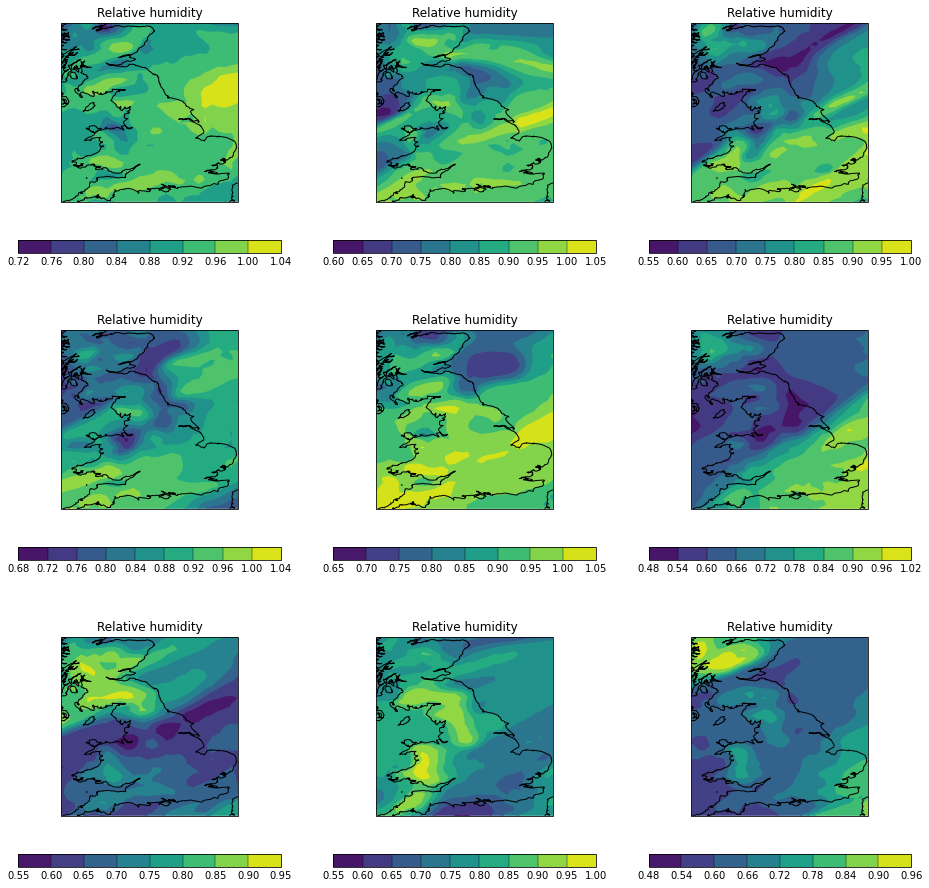

In [8]:
fig1 = matplotlib.pyplot.figure(figsize=(16,16))
for ix1 in range(9):
    matplotlib.pyplot.gcf().add_subplot(3,3,ix1+1)
    iris.quickplot.contourf(cubelist_mogreps_ts[10][ix1,0,0,:,:])
    matplotlib.pyplot.gca().coastlines()
fig1.savefig('/home/h01/shaddad/storm_dennis_humidity.png')

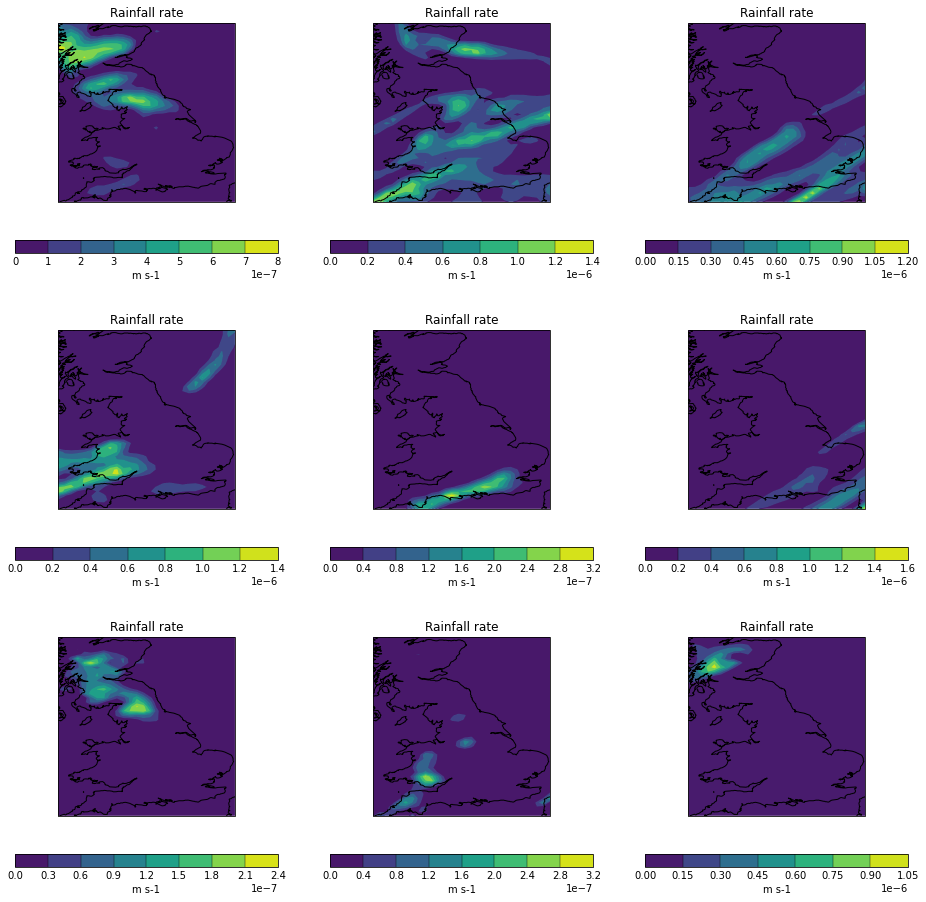

In [9]:
fig1 = matplotlib.pyplot.figure(figsize=(16,16))
for ix1 in range(9):
    matplotlib.pyplot.gcf().add_subplot(3,3,ix1+1)
    iris.quickplot.contourf(cubelist_mogreps_ts[9][ix1,0,:,:])
    matplotlib.pyplot.gca().coastlines()
fig1.savefig('/home/h01/shaddad/storm_dennis_rainfall.png')

In [10]:
radar_gridded_path = radar_path  / 'prd_radar_20200214T0127Z_20200218T2227Z.nc'
radar_gridded_path

PosixPath('/project/informatics_lab/precip_rediagnosis/radar/prd_radar_20200214T0127Z_20200218T2227Z.nc')

In [11]:
radar_cube = iris.load(str(radar_gridded_path))[0]
radar_cube

Rainfall Rate Composite (mm/h),time,latitude,longitude
Shape,40,42,28
Dimension coordinates,,,
time,x,-,-
latitude,-,x,-
longitude,-,-,x
Auxiliary coordinates,,,
day_of_year,x,-,-
forecast_reference_time,x,-,-
hour,x,-,-
Scalar coordinates,,,forecast_period 0 second


In [12]:
list(cubelist_mogreps_ts[0].coord('time').cells())

[Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 15, 9, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 16, 3, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 16, 9, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 15, 21, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 15, 3, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 16, 15, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 17, 3, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 17, 9, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 2, 16, 21, 0, 0, 0, has_year_zero=True), bound=None),
 Cell(point=cftime.DatetimeProlepticGregorian(2020, 

In [ ]:
fig1 = matplotlib.pyplot.figure(figsize=(16,16))
for ix1 in range(9):
    matplotlib.pyplot.gcf().add_subplot(3,3,ix1+1)
    iris.quickplot.contourf([9][ix1,0,:,:])
    matplotlib.pyplot.gca().coastlines()
fig1.savefig('/home/h01/shaddad/storm_dennis_rainfall.png')